In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score 

In [2]:
# data has been collected by using API for sketchfab.com 
dataset = pd.read_csv('model_data.csv')

### CORRELATION / VIEW AND DOWNLOAD COUNTS

In [3]:
# Including only the columns that are being used 
corr_data = dataset[['view_count','download_count', 'material_count', 'texture_count', 'vertex_count', 'face_count']]

# Dropping duplicates and nulls
corr_data = corr_data.drop_duplicates()
corr_data = corr_data.dropna()

#removing strange data where face_count = 0
corr_data = corr_data.drop(corr_data[corr_data['face_count'] ==0].index)

corr_data

,view_count,download_count,material_count,texture_count,vertex_count,face_count
0,73,13,1,0.0,410239,820436
1,66,9,1,1.0,90002,180000
2,127,21,6,6.0,764185,1500000
3,63,8,6,1.0,218625,435170
4,16,2,1,0.0,253125,501264
...,...,...,...,...,...,...
185,46,8,1,1.0,21427,41833
186,46,19,1,0.0,424,844
187,51,37,1,0.0,13,21
188,36,12,6,6.0,824595,1598364


In [4]:
count_x = corr_data['view_count'].tolist()
download_y = corr_data['download_count'].tolist()

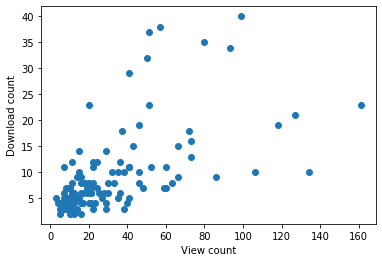

In [5]:
plt.scatter(count_x,download_y)
plt.xlabel("View count")
plt.ylabel("Download count")
plt.show()

In [6]:
# Pearson correlation coefficient
print(np.corrcoef(download_y,count_x))

[[1.         0.58986405]
 [0.58986405 1.        ]]


### REGRESSION ANALYSIS

In [7]:
reg_data = dataset[['view_count','download_count', 'material_count', 'texture_count', 'vertex_count', 'face_count']]

# dropping any NaN values
reg_data = reg_data.dropna()

# dropping strange data where face count == 0 
reg_data = reg_data.drop(reg_data[reg_data['face_count'] ==0].index)

# dropping duplicates 
reg_data = reg_data.drop_duplicates()


#### Regression model with view count with material not removed

In [8]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reg_data[['material_count', 'texture_count', 'vertex_count', 'face_count']], reg_data['view_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient of Determination: 0.05795122973141087
Coefficients: [ 1.50660507e+00  4.05791734e-01  1.04138386e-04 -4.60691752e-05]
Intercept: 28.21261706871806


In [9]:
X_train, X_test, y_train, y_test = train_test_split(reg_data[['material_count', 'texture_count', 'vertex_count']], reg_data['view_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient of Determination: 0.057589260212881244
Coefficients: [1.57121318e+00 6.82860388e-01 1.23517543e-05]
Intercept: 27.807437226971423


In [10]:
X_train, X_test, y_train, y_test = train_test_split(reg_data[['material_count', 'texture_count']], reg_data['view_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficient of Determination: 0.048134378312051807
Coefficients: [1.39472304 0.99111998]
Intercept: 29.96167454934244


In [11]:
X_train, X_test, y_train, y_test = train_test_split(reg_data[['material_count']], reg_data['view_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient of Determination: 0.044506628517380076
Coefficients: [2.08343847]
Intercept: 29.608209269072255


#### Regression model with download count with material count not removed

In [12]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reg_data[['material_count', 'texture_count', 'vertex_count', 'face_count']], reg_data['download_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient of Determination: 0.18271110532058465
Coefficients: [ 5.09224766e-01 -4.35066422e-01  1.19210855e-04 -5.98198375e-05]
Intercept: 6.76641301577157


In [13]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reg_data[['material_count', 'texture_count', 'vertex_count']], reg_data['download_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient of Determination: 0.15199677156667568
Coefficients: [ 5.93117015e-01 -7.52987074e-02  2.78792146e-08]
Intercept: 6.240295667337049


In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reg_data[['material_count', 'texture_count']], reg_data['download_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient of Determination: 0.15199434741714524
Coefficients: [ 0.59271866 -0.07460293]
Intercept: 6.245158008603621


In [15]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reg_data[['material_count']], reg_data['download_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient of Determination: 0.15095992914931877
Coefficients: [0.54087812]
Intercept: 6.271763815291446


#### Regression analysis with download count and vertex not removed

In [16]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reg_data[['vertex_count', 'texture_count', 'material_count','face_count']], reg_data['download_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient of Determination: 0.18271110532058477
Coefficients: [ 1.19210855e-04 -4.35066422e-01  5.09224766e-01 -5.98198375e-05]
Intercept: 6.7664130158214455


In [17]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reg_data[['vertex_count', 'texture_count', 'face_count']], reg_data['download_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient of Determination: 0.12902987419252487
Coefficients: [ 1.53044789e-04 -1.32470564e-01 -7.70440320e-05]
Intercept: 7.760316704729821


In [18]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reg_data[['vertex_count', 'texture_count']], reg_data['download_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient of Determination: 0.075544581102161
Coefficients: [-5.62652203e-07  4.21363254e-01]
Intercept: 7.270357727388551


In [19]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reg_data[['vertex_count']], reg_data['download_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient of Determination: 0.00010859817677366657
Coefficients: [1.83094663e-07]
Intercept: 7.874983093661917


#### Regression analysis with view count and vertex not removed

In [20]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reg_data[['vertex_count', 'texture_count', 'material_count', 'face_count']], reg_data['view_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient of Determination: 0.05795122973141087
Coefficients: [ 1.04138386e-04  4.05791734e-01  1.50660507e+00 -4.60691752e-05]
Intercept: 28.212617068681674


In [21]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reg_data[['vertex_count', 'texture_count', 'face_count']], reg_data['view_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient of Determination: 0.048614328448196686
Coefficients: [ 2.04240307e-04  1.30105937e+00 -9.70291057e-05]
Intercept: 31.15320526573226


In [22]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reg_data[['vertex_count', 'texture_count']], reg_data['view_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient of Determination: 0.04692870363181412
Coefficients: [1.07873905e-05 1.99855662e+00]
Intercept: 30.536151872239806


In [23]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reg_data[['vertex_count']], reg_data['view_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
R_square = r2_score(y_train, y_pred)

print(f'Coefficient of Determination: {R_square}')
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient of Determination: 0.013207844400904167
Coefficients: [1.43245223e-05]
Intercept: 33.4039340416036


### ERROR ANALYSIS

In [24]:
# re-calculating the best model based on train sets' r2 scores
X_train, X_test, y_train, y_test = train_test_split(reg_data[['vertex_count', 'texture_count', 'material_count','face_count']], reg_data['view_count'], test_size=0.62, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# residuals on test data
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# root mean square error RMSE
rmse = math.sqrt(mse)

# mean absolute error
mae = mean_absolute_error(y_test,y_pred)

# r2 for the test data
R_squared = r2_score(y_test, y_pred)

print(f'MSE : {mse}')
print(f'RMSE : {rmse}')
print(f'MAE : {mae}')
print(f'R2-score : {R_squared}')


MSE : 628.8992680810654
RMSE : 25.077864105243602
MAE : 20.41369530738039
R2-score : 0.023527898394784308


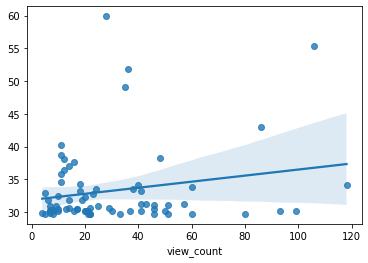

In [34]:
sns.regplot(y_test, y_pred)